In [14]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("The_Cigarette_Consumption_Panel_Data_Set_519_55.csv").drop(
        ["Unnamed: 0", "X"], 
        axis = 1
        )

df.head()

,state,year,cpi,pop,packpc,income,tax,avgprs,taxs
0,AL,1985,1.076,3973000,116.486282,46014968,32.500004,102.181671,33.348335
1,AR,1985,1.076,2327000,128.534592,26210736,37.000000,101.474998,37.000000
2,AZ,1985,1.076,3184000,104.522614,43956936,31.000000,108.578751,36.170418
3,CA,1985,1.076,26444000,100.363037,447102816,26.000000,107.837341,32.104000
4,CO,1985,1.076,3209000,112.963539,49466672,31.000000,94.266663,31.000000


In [3]:
df["income_per_capita"] = df["income"] / df["pop"]

In [4]:
X_with_state_dummies = pd.get_dummies(df[['avgprs', 'income_per_capita', 'year', 'state']], 
                                       columns=['state'], drop_first=True, dtype="int")

y = df["packpc"]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X_with_state_dummies, y, test_size=0.33, random_state=42)

In [6]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
coefficients = model.coef_
intercept = model.intercept_

np.float64(221.98326749388525)

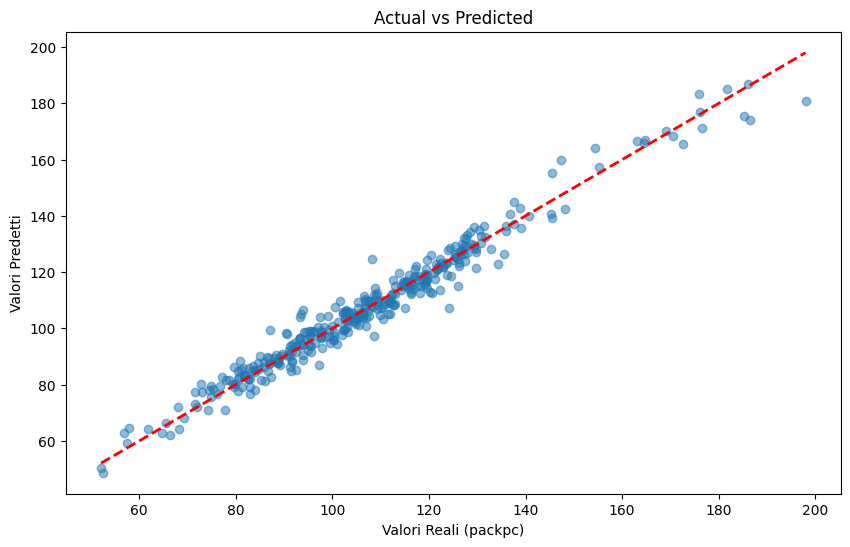

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], 
         [y_train.min(), y_train.max()], 
         'r--', lw=2)
plt.xlabel('Valori Reali (packpc)')
plt.ylabel('Valori Predetti')
plt.title('Actual vs Predicted')
plt.show()

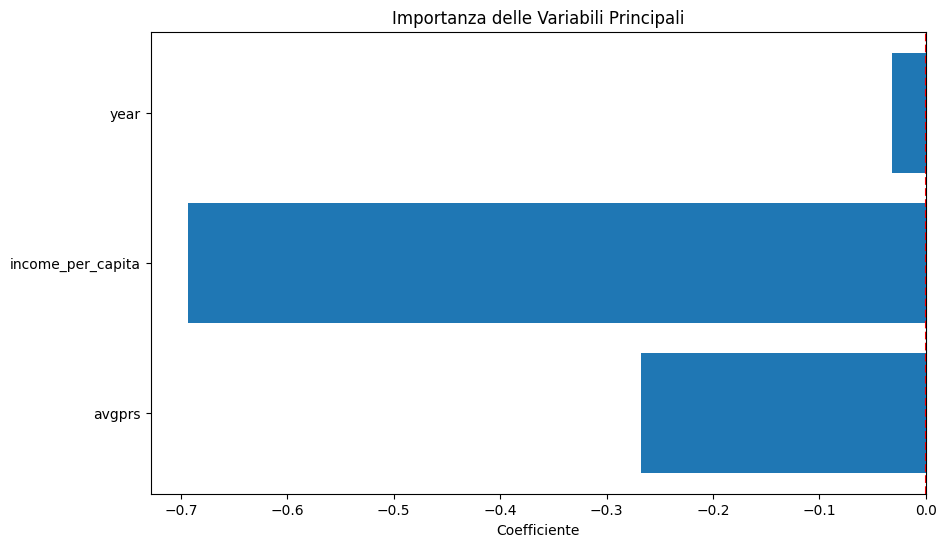

In [17]:
# Escludi i coefficienti delle dummy (troppi)
main_features = ['avgprs', 'income_per_capita', 'year']
main_coefs = coefficients[:3]

plt.figure(figsize=(10, 6))
plt.barh(main_features, main_coefs)
plt.xlabel('Coefficiente')
plt.title('Importanza delle Variabili Principali')
plt.axvline(x=0, color='red', linestyle='--')
plt.show()